<a href="https://colab.research.google.com/github/herysedra/covid19-mankaiza-clone/blob/andrana/stats/stat_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install pingouin

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time
import pingouin 

#from pingouin import corr
import pandas.util.testing as tm

cco_cases_mdg = pd.read_csv("/content/drive/My Drive/data/cco mdg.csv")

tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")

ke_datafar = pd.read_csv("/content/drive/My Drive/data/Kenyans data.csv")

cco_cases_mdg.set_index('Date', inplace=True)

tilyvoa.set_index('Daty', inplace=True)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [154]:
tilyvoa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 2020-3-18 to 2020-5-14
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Loharano          51 non-null     object 
 1   Faritra           0 non-null      float64
 2   Tily ara-potoana  2 non-null      float64
 3   Tilytot tvm       11 non-null     float64
 4   Tilyvaoamb        49 non-null     float64
 5   Tily              39 non-null     float64
 6   Voa               38 non-null     float64
 7   Voavao tvm        45 non-null     float64
 8   Tsyvoa            38 non-null     float64
 9   Tilym             38 non-null     float64
 10  Voareh ilain      38 non-null     float64
 11  Voareh tvm        45 non-null     float64
 12  Sitranreh ilain   38 non-null     float64
 13  Sitranreh tvm     33 non-null     float64
 14  Sitranvao tvm     32 non-null     float64
dtypes: float64(14), object(1)
memory usage: 7.2+ KB


In [135]:
tily = tilyvoa.loc[:,'Tily']
voa = tilyvoa.loc[:, 'Voa']
tsyvoa = tilyvoa.loc[:, 'Tsyvoa']
tilym = tilyvoa.loc[:,'Tilym']
type(voa)

pandas.core.series.Series

In [0]:
corr(tily, voa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.03,"[-0.29, 0.35]",0.001,-0.056,0.858324,0.053


In [0]:
corr(tily, tsyvoa, method= 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,38,0.986,"[0.97, 0.99]",0.973,0.971,1.075574e-29,1.0


In [0]:
corr(tily, voa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.074,"[-0.25, 0.38]",0.005,-0.051,0.665215,0.072


In [0]:
corr(tily, tsyvoa, method= 'skipped')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
skipped,38,1,0.985,"[0.97, 0.99]",0.971,0.969,1.889566e-28,1.0


In [0]:
corr(tily, voa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.072,"[-0.25, 0.38]",0.005,-0.052,0.677592,0.071


In [0]:
corr(tily, tsyvoa, method= 'shepherd')

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,38,2,0.988,"[0.98, 0.99]",0.976,0.975,4.178122e-29,1.0


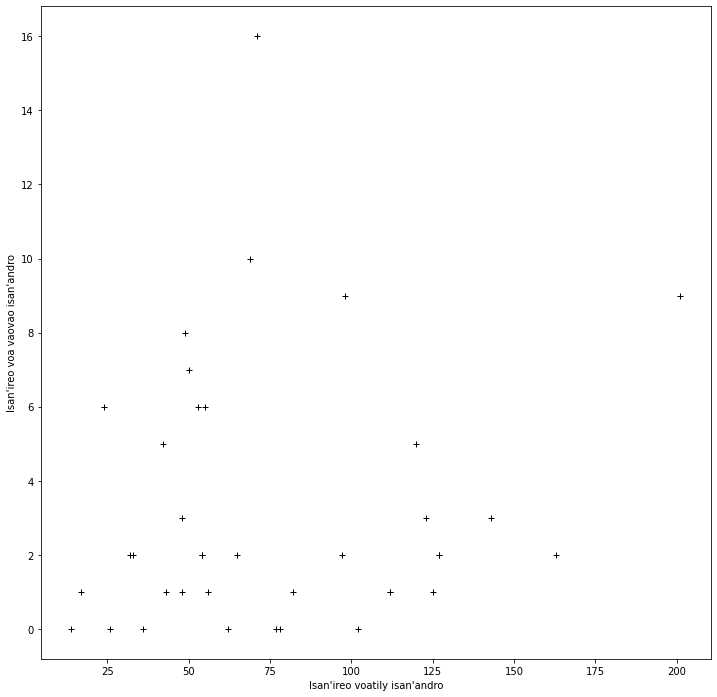

In [155]:
plt.figure(figsize=(12, 12))
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo voa vaovao isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa.eps')
plt.savefig(path_to_save+'tilvoa.png')

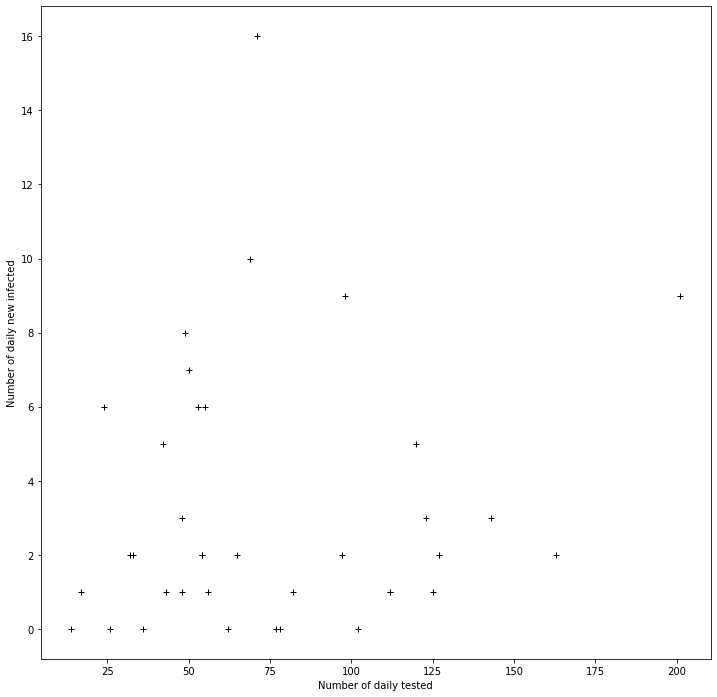

In [156]:
plt.figure(figsize=(12, 12))
plt.plot(tily, voa, marker ="+",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily new infected")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tilvoa_eng.png')

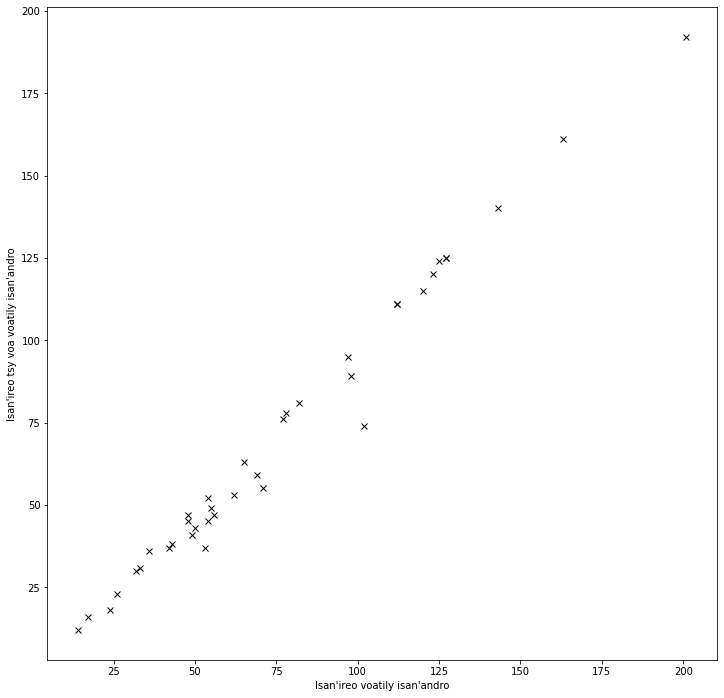

In [108]:
plt.figure(figsize=(12, 12))
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Isan'ireo voatily isan'andro")
plt.ylabel("Isan'ireo tsy voa voatily isan'andro")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa.eps')
plt.savefig(path_to_save+'tiltsvoa.png')

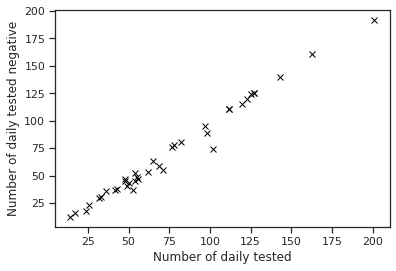

In [0]:
plt.figure()
plt.plot(tily, tsyvoa, marker ="x",ls = 'None', color='black')
plt.xlabel("Number of daily tested")
plt.ylabel("Number of daily tested negative")
#plt.legend(loc= 'best')
#plt.suptitle("Fivoarana raha R0 omen'ny antontan'isa CCO")
plt.savefig(path_to_save+'tiltsvoa_eng.eps')
plt.savefig(path_to_save+'tiltsvoa_eng.png')

In [0]:
# Construction of contingency table
bt = pd.IntervalIndex.from_tuples([(13, 47), (47, 81), (81, 210)])
btt = pd.IntervalIndex.from_tuples([(10, 47), (47, 81), (81, 210)])
bv = pd.IntervalIndex.from_tuples([(-0.1, 1), (1,17)])

tilyvoa['Tily_heba'] = pd.cut(tilyvoa['Tily'], bins=bt, include_lowest=True)
tilyvoa['Voa_heba'] = pd.cut(tilyvoa['Voa'], bins=bv, include_lowest=True)
tilyvoa['Tilym_heba'] = pd.cut(tilyvoa['Tilym'], bins=bt, include_lowest=True)
tilyvoa['Tsyvoa_heba'] = pd.cut(tilyvoa['Tsyvoa'], bins=btt, include_lowest=True)

ddt = tilyvoa.loc[ : , ['Tily', 'Tily_heba'] ]
ddv = tilyvoa.loc[ : , ['Voa', 'Voa_heba'] ]
ddtv = tilyvoa.loc[ : , ['Tsyvoa', 'Tsyvoa_heba'] ]
ddtm = tilyvoa.loc[ : , ['Tilym', 'Tilym_heba'] ]


#print(ddt)
#print(ddv)

In [0]:
tomb_tv, hita_tv, stats_tv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Voa_heba')
tomb_tmv, hita_tmv, stats_tmv = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
tomb_ttv, hita_ttv, stats_ttv = pingouin.chi2_independence(tilyvoa, x='Tily_heba', y='Tsyvoa_heba')

tombm_ttv, hitam_ttv, statsm_ttv = pingouin.chi2_independence(tilyvoa, x='Tily', y='Tsyvoa')

print(tomb_tv)
print(tomb_tmv)
print(tomb_ttv)
print(hita_ttv)
print(hitam_ttv)

Voa_heba   (-0.1, 1.0]  (1.0, 17.0]
Tily_heba                          
(13, 47]      3.552632     5.447368
(47, 81]      5.921053     9.078947
(81, 210]     5.526316     8.473684
Voa_heba    (-0.1, 1.0]  (1.0, 17.0]
Tilym_heba                          
(13, 47]       3.947368     6.052632
(47, 81]       5.526316     8.473684
(81, 210]      5.526316     8.473684
Tsyvoa_heba  (10, 47]  (47, 81]  (81, 210]
Tily_heba                                 
(13, 47]     3.789474  2.368421   2.842105
(47, 81]     6.315789  3.947368   4.736842
(81, 210]    5.894737  3.684211   4.421053
Tsyvoa_heba  (10, 47]  (47, 81]  (81, 210]
Tily_heba                                 
(13, 47]            9         0          0
(47, 81]            7         8          0
(81, 210]           0         2         12
Tsyvoa  12   16   18   23   30   31   36   ...  115  120  124  125  140  161  192
Tily                                       ...                                   
14        1    0    0    0    0    0    0

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


In [0]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
observed

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


Voa_heba,"(-0.1, 1.0]","(1.0, 17.0]"
Tilym_heba,,
"(13, 47]",5,5
"(47, 81]",5,9
"(81, 210]",5,9


In [0]:
expected, observed, stats = pingouin.chi2_independence(tilyvoa, x='Tilym_heba', y='Voa_heba')
stats.round(5)

/usr/local/lib/python3.6/dist-packages/pingouin/contingency.py:149: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))


,test,lambda,chi2,dof,p,cramer,power
0,pearson,1.000,0.629,2.0,0.73001,0.12870,0.10045
1,cressie-read,0.667,0.626,2.0,0.73119,0.12837,0.10017
2,log-likelihood,0.000,0.621,2.0,0.73308,0.12784,0.09974
3,freeman-tukey,-0.500,0.618,2.0,0.73409,0.12755,0.09951
4,mod-log-likelihood,-1.000,0.616,2.0,0.73475,0.12737,0.09935
5,neyman,-2.000,0.616,2.0,0.73507,0.12728,0.09928


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


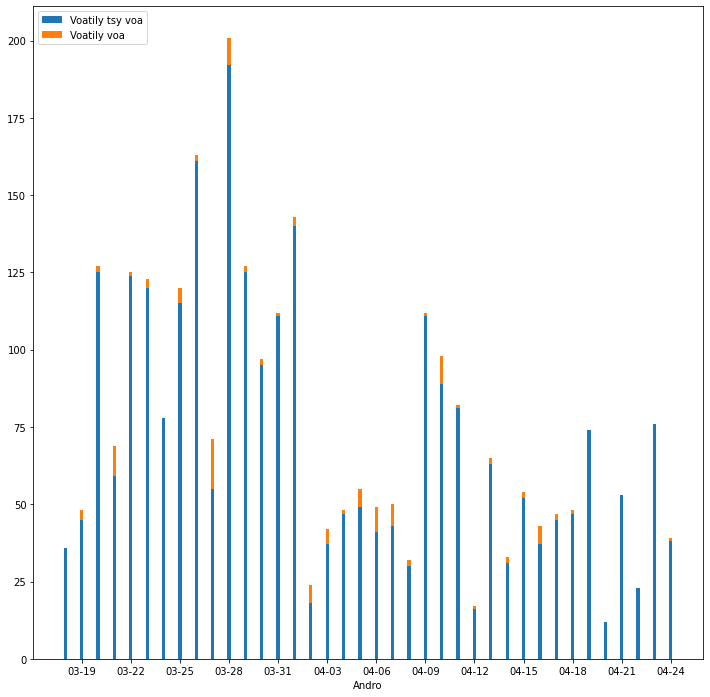

In [163]:
tilyvoa.index = pd.to_datetime(tilyvoa.index)

#df = pd.DataFrame(index=tilyvoa.index, data={'Voatily tsy voa': tilyvoa['Tsyvoa'], 'Voatily voa':tilyvoa['Voa']})
#df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoa.index, tilyvoa['Tsyvoa'], width= 0.2, label = 'Voatily tsy voa')
ax.bar(tilyvoa.index, tilyvoa['Voa'], width= 0.2, bottom = tilyvoa['Tsyvoa'], label = 'Voatily voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgtahatv.eps')

plt.show()

In [158]:
datacounty = ke_datafar.groupby('Faritra')

ketilyvoa = datacounty.get_group('Kenya')

ketilyvoa.set_index('Daty', inplace=True)

ketilyvoa['Tsyvoa'] = ketilyvoa['Tilyvao'] - ketilyvoa['Ivao']

ketilyvoa['Tsyvoatomb'] = ketilyvoa['Tilyvaotomb'] - ketilyvoa['Ivao']

ketilyvoa.index = pd.to_datetime(ketilyvoa.index)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


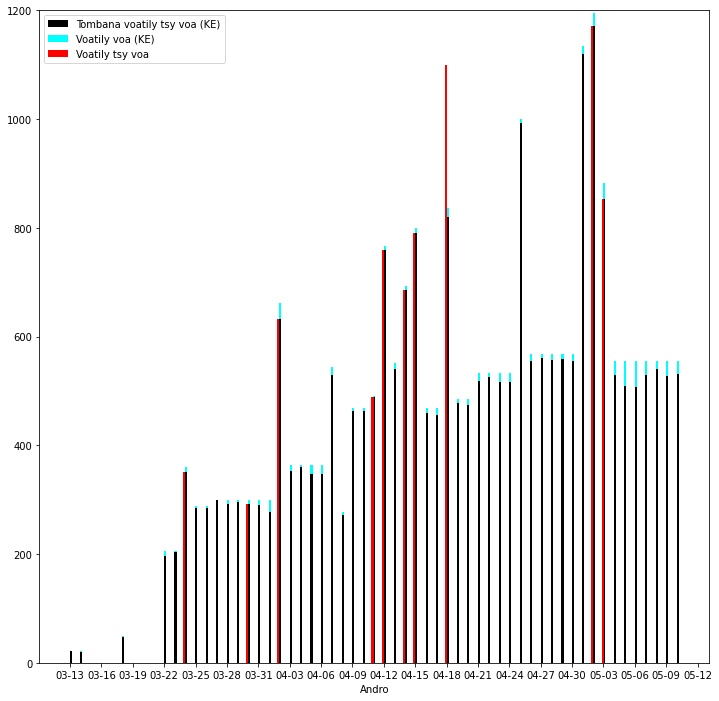

In [169]:
fig, ax = plt.subplots(figsize=(12, 12))

frt = np.ones(len(ketilyvoa.index))*datetime.timedelta(hours=2)

ax.bar(ketilyvoa.index + frt, ketilyvoa['Tsyvoatomb'], width= 0.2, color = 'black', label = 'Tombana voatily tsy voa (KE)')
ax.bar(ketilyvoa.index + frt, ketilyvoa['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoa['Tsyvoatomb'], label = 'Voatily voa (KE)')
ax.bar(ketilyvoa.index - frt, ketilyvoa['Tsyvoa'], width= 0.2, color = 'red', label = 'Voatily tsy voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(0,1200)
plt.savefig(path_to_save+'ketahatv.eps')

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


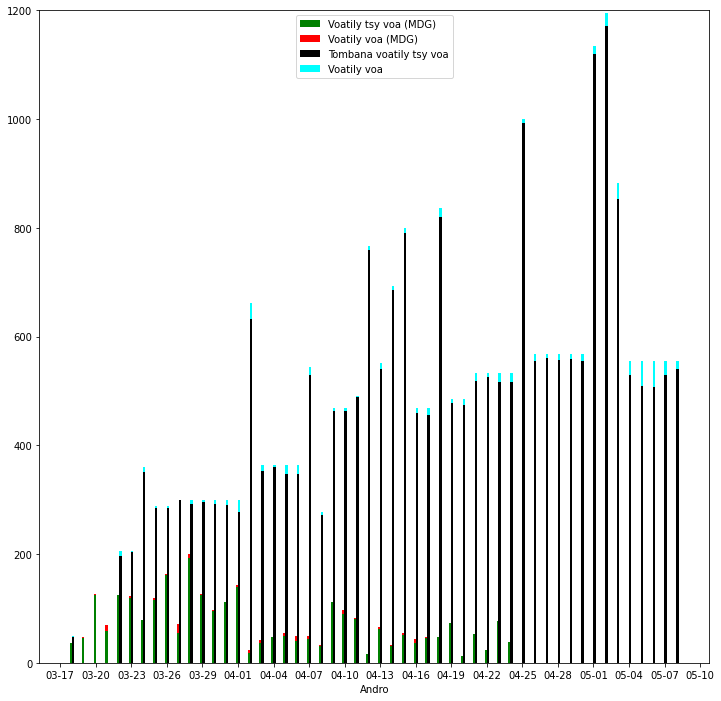

In [170]:
ketilyvoam = ketilyvoa.loc['2020-03-18':'2020-05-08']
tilyvoam = tilyvoa.loc['2020-03-18':'2020-05-08']

fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoam.index))*datetime.timedelta(hours=2)

ax.bar(tilyvoam.index - frtm, tilyvoam['Tsyvoa'], width = 0.2, color= 'green', label = 'Voatily tsy voa (MDG)')
ax.bar(tilyvoam.index - frtm, tilyvoam['Voa'], width = 0.2, color= 'red', bottom = tilyvoam['Tsyvoa'], label = 'Voatily voa (MDG)')

ax.bar(ketilyvoam.index + frtm, ketilyvoam['Tsyvoatomb'], width= 0.2, color = 'black', label = 'Tombana voatily tsy voa')
ax.bar(ketilyvoam.index + frtm, ketilyvoam['Ivao'], width= 0.2, color ='cyan', bottom = ketilyvoam['Tsyvoatomb'], label = 'Voatily voa')

ax.set(xlabel ='Andro')

date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1200)
plt.savefig(path_to_save+'mdgketahatv.eps')

plt.show()